<a href="https://www.kaggle.com/code/alexanderparikesit/heart-failure-predictions?scriptVersionId=105671767" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


Based on Kaggle Forum Discussion, here are explanation of the Dataset variable:

* age: Age of the patient
* anemia: Haemoglobin level of patient (Boolean)
* creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
* diabetes: If the patient has diabetes (Boolean)
* ejection_fraction: Percentage of blood leaving the heart at each contraction
* high_blood_pressure: If the patient has hypertension (Boolean)
* platelets: Platelet count of blood (kiloplatelets/mL)
* serum_creatinine: Level of serum creatinine in the blood (mg/dL)
* serum_sodium: Level of serum sodium in the blood (mEq/L)
* sex: Sex of the patient (0 = Female, 1 = Male)
* smoking: If the patient smokes or not (Boolean)
* time: Follow-up period (days)
* DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)

# Import The Data Set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
df.rename(columns = {'anaemia':'anemia'}, inplace=True)

In [10]:
df.columns

Index(['age', 'anemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Exploratory Data Analysis

In [11]:
sns.set_style('whitegrid')

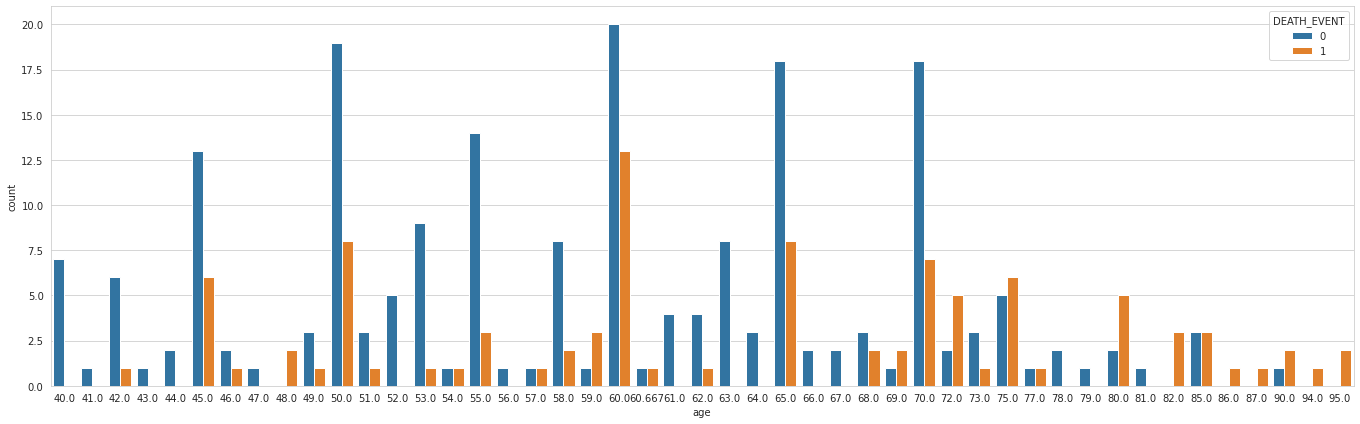

In [12]:
plt.figure(figsize=(19,6))
sns.countplot(data=df, x='age', hue='DEATH_EVENT')
plt.tight_layout()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

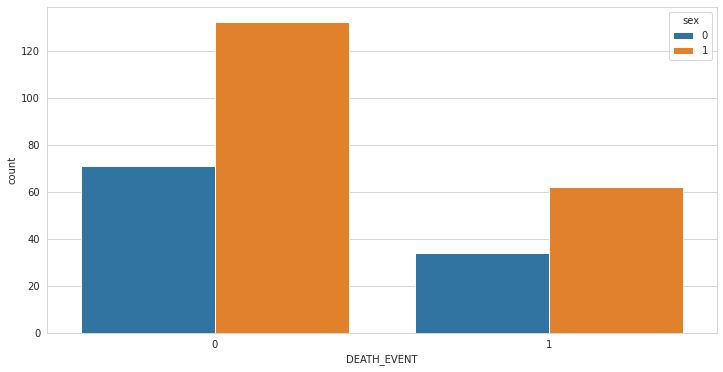

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEATH_EVENT', hue='sex')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

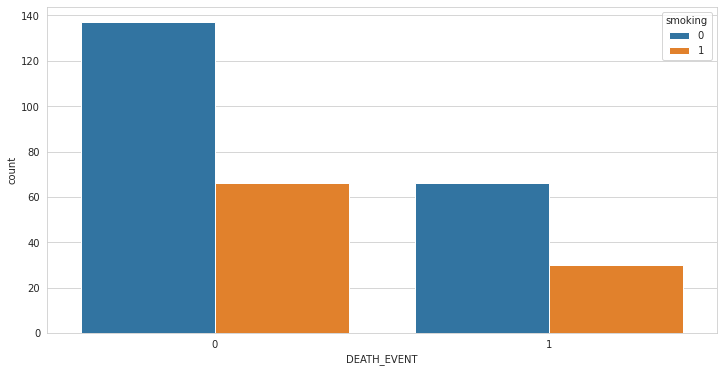

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEATH_EVENT', hue='smoking')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

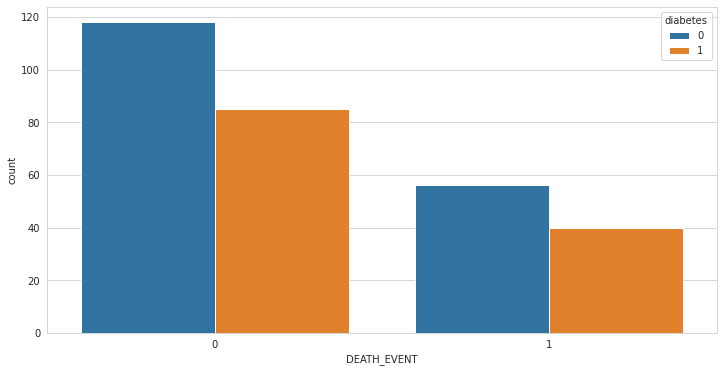

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEATH_EVENT', hue='diabetes')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

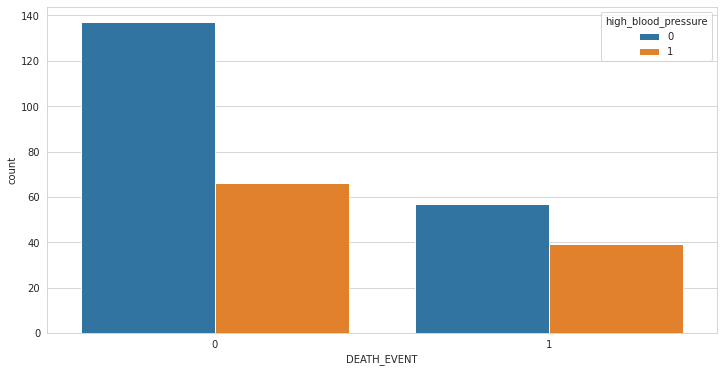

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEATH_EVENT', hue='high_blood_pressure')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

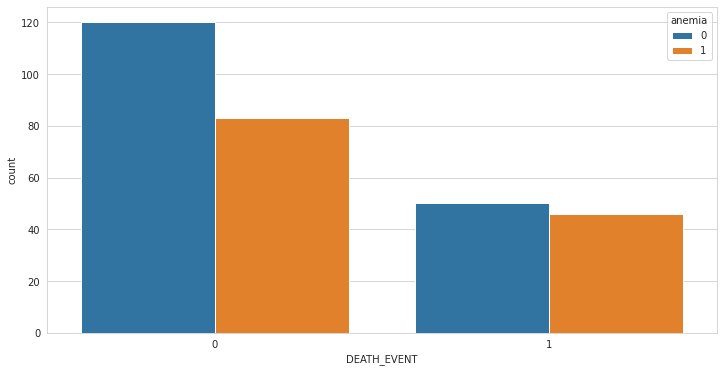

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEATH_EVENT', hue='anemia')

In [18]:
df.corr()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

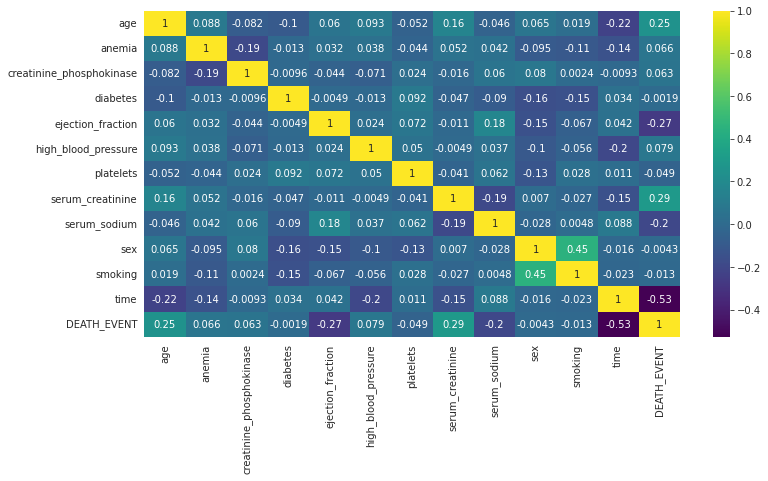

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

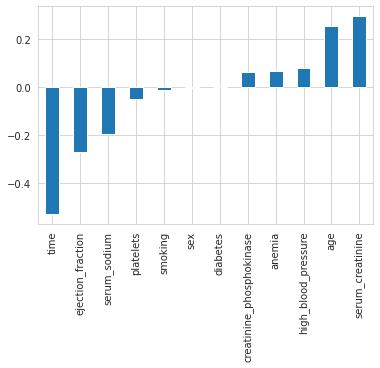

In [20]:
df.corr()['DEATH_EVENT'].sort_values()[:-1].plot(kind='bar')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

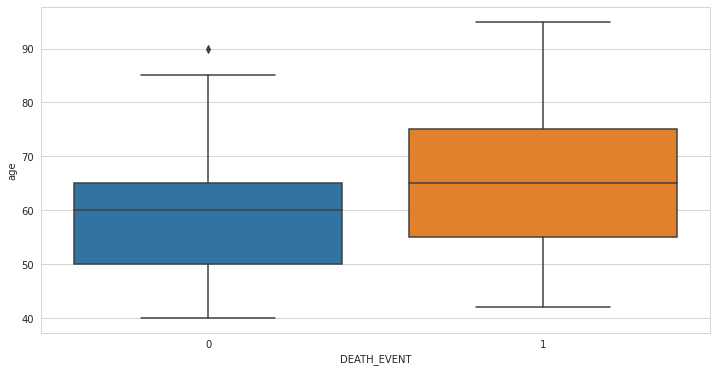

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='DEATH_EVENT', y='age')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

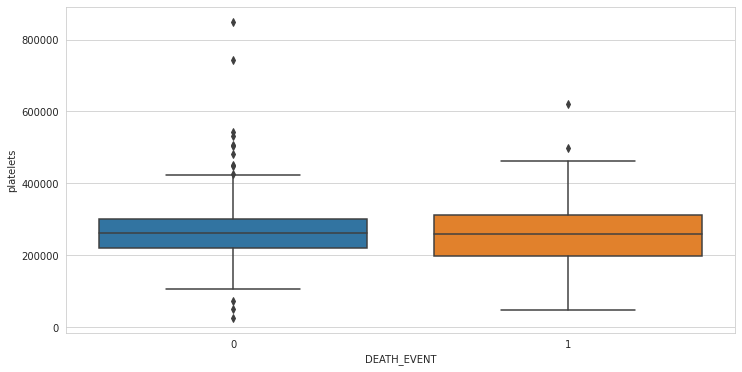

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='DEATH_EVENT', y='platelets')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

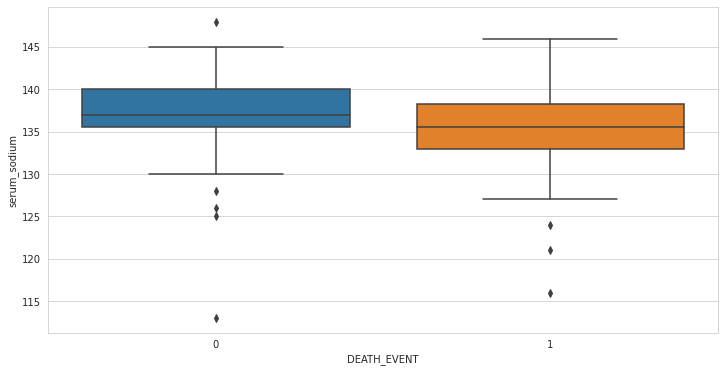

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_sodium')

# Scalling The Data

## Train Test Split 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

## Scaling 

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
print(X_train.shape)
print(X_test.shape)

(209, 12)
(90, 12)


# Support Vector Machines

In [32]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
model_svm = svm.SVC()

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

model_svm.score(X_test, y_test)

0.7666666666666667

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        60
           1       0.71      0.50      0.59        30

    accuracy                           0.77        90
   macro avg       0.75      0.70      0.71        90
weighted avg       0.76      0.77      0.75        90



<AxesSubplot:>

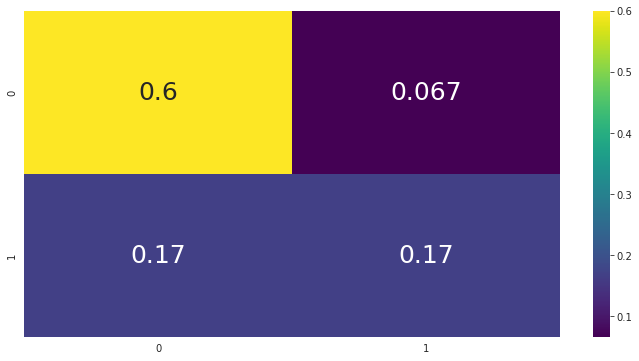

In [35]:
plt.figure(figsize=(12,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis', annot=True, annot_kws={'size':25})

# Creating Neural Network a Model 

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [37]:
early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

model = Sequential()

model.add(Dense(12, activation='relu', input_dim=12))

model.add(Dense(12, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2022-09-14 15:30:07.538900: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [38]:
model.fit(X_train, y_train.values, callbacks=[early_stopping],
         batch_size=25, epochs=120, validation_split=0.25)

2022-09-14 15:30:08.119642: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/120
7/7 [==============================] - 1s 50ms/step - loss: 0.7205 - accuracy: 0.4103 - val_loss: 0.7201 - val_accuracy: 0.1887
Epoch 2/120
7/7 [==============================] - 0s 10ms/step - loss: 0.6952 - accuracy: 0.3974 - val_loss: 0.7078 - val_accuracy: 0.2453
Epoch 3/120
7/7 [==============================] - 0s 9ms/step - loss: 0.7154 - accuracy: 0.4295 - val_loss: 0.6970 - val_accuracy: 0.4906
Epoch 4/120
7/7 [==============================] - 0s 9ms/step - loss: 0.7000 - accuracy: 0.4936 - val_loss: 0.6879 - val_accuracy: 0.6604
Epoch 5/120
7/7 [==============================] - 0s 9ms/step - loss: 0.6845 - accuracy: 0.6218 - val_loss: 0.6811 - val_accuracy: 0.7736
Epoch 6/120
7/7 [==============================] - 0s 9ms/step - loss: 0.6902 - accuracy: 0.5705 - val_loss: 0.6750 - val_accuracy: 0.8113
Epoch 7/120
7/7 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5449 - val_loss: 0.6701 - val_accuracy: 0.8302
Epoch 8/120
7/7 [========

In [39]:
val_accuracy = np.mean(model.history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 81.08%


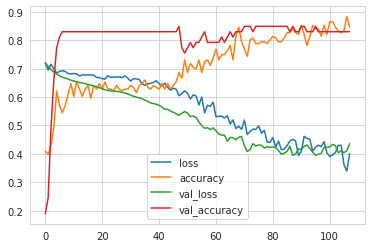

In [40]:
losses = pd.DataFrame(model.history.history).plot()

# Evaluating a Model

In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        60
           1       0.66      0.70      0.68        30

    accuracy                           0.78        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.78      0.78      0.78        90



<AxesSubplot:>

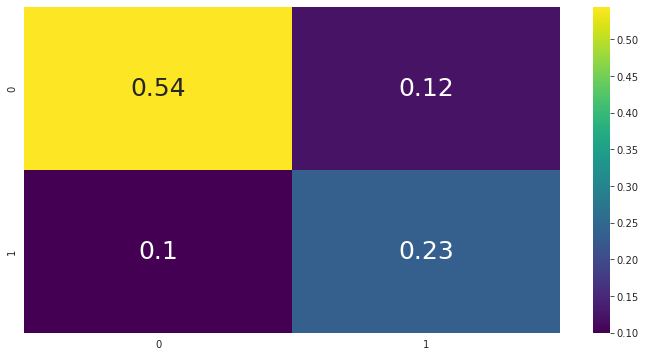

In [43]:
plt.figure(figsize=(12,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis', annot=True, annot_kws={'size':25})

In [44]:
heart_predict = df.drop('DEATH_EVENT', axis=1).iloc[10]

In [45]:
heart_predict = scaler.transform(heart_predict.values.reshape(-1, 12))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [46]:
model.predict(heart_predict)

array([[0.9312752]], dtype=float32)

In [47]:
df.head(10)

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [48]:
heart_predict = df.drop('DEATH_EVENT', axis=1).iloc[288]

In [49]:
heart_predict = scaler.transform(heart_predict.values.reshape(-1, 12))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [50]:
model.predict(heart_predict)

array([[0.09878179]], dtype=float32)

In [51]:
df.tail(10)

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0
